In [2]:
import csv
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import spy_data.csv
spy_data = pd.read_csv('spy_data.csv')

# convert the date column to datetime
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
print(spy_data.head())

        Date  Close/Last     Volume    Open      High     Low
0 2022-07-01      381.24   74839730  376.56  381.7000  373.80
1 2022-06-30      377.25  112508300  376.24  380.6582  372.56
2 2022-06-29      380.34   65676000  381.23  382.2700  378.42
3 2022-06-28      380.65   86689820  390.23  393.1600  380.53
4 2022-06-27      388.59   66009620  391.05  391.3600  387.44


In [3]:
# create a new column called 'day' 
spy_data['day'] = spy_data['Date'].dt.day_name()
print(spy_data.head())

        Date  Close/Last     Volume    Open      High     Low        day
0 2022-07-01      381.24   74839730  376.56  381.7000  373.80     Friday
1 2022-06-30      377.25  112508300  376.24  380.6582  372.56   Thursday
2 2022-06-29      380.34   65676000  381.23  382.2700  378.42  Wednesday
3 2022-06-28      380.65   86689820  390.23  393.1600  380.53    Tuesday
4 2022-06-27      388.59   66009620  391.05  391.3600  387.44     Monday


In [4]:
# add a new column called percent_change
spy_data['percent_change'] = (spy_data['Close/Last'] / spy_data['Open'] - 1)*100
print(spy_data.head())

        Date  Close/Last     Volume    Open      High     Low        day  \
0 2022-07-01      381.24   74839730  376.56  381.7000  373.80     Friday   
1 2022-06-30      377.25  112508300  376.24  380.6582  372.56   Thursday   
2 2022-06-29      380.34   65676000  381.23  382.2700  378.42  Wednesday   
3 2022-06-28      380.65   86689820  390.23  393.1600  380.53    Tuesday   
4 2022-06-27      388.59   66009620  391.05  391.3600  387.44     Monday   

   percent_change  
0        1.242830  
1        0.268446  
2       -0.233455  
3       -2.454962  
4       -0.629076  


        Date  Close/Last     Volume    Open      High     Low        day  \
0 2022-07-01      381.24   74839730  376.56  381.7000  373.80     Friday   
1 2022-06-30      377.25  112508300  376.24  380.6582  372.56   Thursday   
2 2022-06-29      380.34   65676000  381.23  382.2700  378.42  Wednesday   
3 2022-06-28      380.65   86689820  390.23  393.1600  380.53    Tuesday   
4 2022-06-27      388.59   66009620  391.05  391.3600  387.44     Monday   

   percent_change  percent_change_sum  percent_change_5d  
0        1.242830            7.421945           0.014726  
1        0.268446           21.859364           0.043030  
2       -0.233455            8.614184           0.016727  
3       -2.454962           -8.061855          -0.015654  
4       -0.629076           11.871797           0.025099  


<AxesSubplot:xlabel='day'>

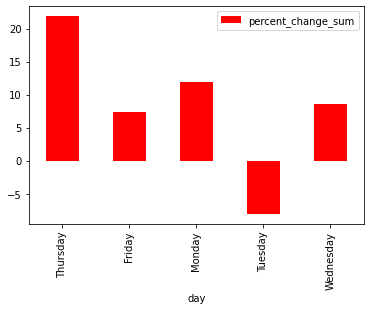

In [16]:
# sum the percent_change column for each day of the week
spy_data['percent_change_sum'] = spy_data.groupby(
    'day')['percent_change'].transform('sum')
print(spy_data.head())

# Plot the first 5 days of the week with the x axis labeled by day of the week on a bar chart, reverse the order of the data
spy_data.sort_values(by='Date', ascending=True).head(5).plot(
    x='day', y='percent_change_sum', kind='bar', color='red')


In [20]:
# find the average percet change for each month
spy_data['month'] = spy_data['Date'].dt.month_name()
spy_data['month_avg'] = spy_data.groupby('month')['percent_change'].transform('sum')
spy_data.head(12)

,Date,Close/Last,Volume,Open,High,Low,day,percent_change,percent_change_sum,percent_change_5d,month,month_avg
0,2022-07-01,381.24,74839730,376.56,381.7000,373.8000,Friday,1.242830,7.421945,0.014726,July,12.731849
1,2022-06-30,377.25,112508300,376.24,380.6582,372.5600,Thursday,0.268446,21.859364,0.043030,June,-5.900691
2,2022-06-29,380.34,65676000,381.23,382.2700,378.4200,Wednesday,-0.233455,8.614184,0.016727,June,-5.900691
3,2022-06-28,380.65,86689820,390.23,393.1600,380.5300,Tuesday,-2.454962,-8.061855,-0.015654,June,-5.900691
4,2022-06-27,388.59,66009620,391.05,391.3600,387.4400,Monday,-0.629076,11.871797,0.025099,June,-5.900691
5,2022-06-24,390.08,98050330,381.40,390.0900,381.3650,Friday,2.275826,7.421945,0.014726,June,-5.900691
6,2022-06-23,378.06,79292140,376.64,378.8300,372.8900,Thursday,0.377018,21.859364,0.043030,June,-5.900691
7,2022-06-22,374.39,90059420,370.62,378.7200,370.1800,Wednesday,1.017214,8.614184,0.016727,June,-5.900691
8,2022-06-21,375.07,76811860,371.89,376.5250,371.8100,Tuesday,0.855092,-8.061855,-0.015654,June,-5.900691
9,2022-06-17,365.86,111113900,365.51,369.3800,362.1700,Friday,0.095757,7.421945,0.014726,June,-5.900691
